In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
russell = pd.read_csv('Daily russell Trading Strategy.csv')
russell.head(10)

,PERMNO,date,SICCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,RET,...,comp_size,dummy_negative,dummy_positive,dummy_total,move_avg_10,move_avg_20,move_avg_30,lasso_pred,pred_forest,log_pred
0,10026,2023-02-14,2052,JJSF,J & J SNACK FOODS CORP,-1.583958,-1.595700,-1.781575,-0.514877,-1.491794,...,4,0,0,0,1,1,1,0.001108,0.006255,Positive
1,10026,2023-02-15,2052,JJSF,J & J SNACK FOODS CORP,-1.722191,-1.854910,-1.771656,-0.481347,0.002316,...,4,0,0,0,1,1,1,0.001549,-0.002886,Positive
2,10026,2023-02-16,2052,JJSF,J & J SNACK FOODS CORP,-1.761468,-1.873425,-1.895099,-0.078508,-0.618119,...,4,0,0,1,1,1,1,-0.000372,0.000422,Negative
3,10026,2023-02-17,2052,JJSF,J & J SNACK FOODS CORP,-1.835483,-1.724760,-1.577671,-0.442951,1.444537,...,4,0,0,0,0,1,1,-0.001538,-0.020999,Negative
4,10026,2023-02-21,2052,JJSF,J & J SNACK FOODS CORP,-1.610905,-1.469363,-1.433286,-0.021685,0.619504,...,4,0,0,0,0,0,1,-0.003949,0.002892,Negative
5,10026,2023-02-22,2052,JJSF,J & J SNACK FOODS CORP,-1.325058,-1.366986,-1.293308,0.568881,0.593379,...,4,0,0,1,0,0,0,-0.001330,0.007047,Negative
6,10026,2023-02-23,2052,JJSF,J & J SNACK FOODS CORP,-1.253050,-1.313621,-1.346214,-0.128072,-0.282606,...,4,0,0,0,0,0,0,-0.000295,-0.007329,Negative
7,10026,2023-02-24,2052,JJSF,J & J SNACK FOODS CORP,-1.678550,-1.387919,-1.442103,-0.549365,-0.478039,...,4,0,0,0,0,0,0,-0.003520,0.000869,Negative
8,10026,2023-02-27,2052,JJSF,J & J SNACK FOODS CORP,-1.353970,-1.439956,-1.467453,-0.056358,-0.159342,...,4,0,0,0,0,0,0,-0.001035,-0.001363,Negative
9,10026,2023-02-28,2052,JJSF,J & J SNACK FOODS CORP,-1.517077,-1.626195,-1.722056,0.243524,-1.205428,...,4,0,0,0,1,0,1,0.001751,0.001531,Positive


In [3]:
russell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473210 entries, 0 to 473209
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PERMNO            473210 non-null  int64  
 1   date              473210 non-null  object 
 2   SICCD             473210 non-null  int64  
 3   TICKER            473210 non-null  object 
 4   COMNAM            473210 non-null  object 
 5   BIDLO             473210 non-null  float64
 6   ASKHI             473210 non-null  float64
 7   PRC               473210 non-null  float64
 8   VOL               473210 non-null  float64
 9   RET               473210 non-null  float64
 10  SHROUT            473210 non-null  float64
 11  RETX              473210 non-null  float64
 12  sprtrn            473210 non-null  float64
 13  positive          473210 non-null  int64  
 14  negative          473210 non-null  int64  
 15  total             473210 non-null  int64  
 16  market_cap        47

In [4]:
# Change PERMNO column to object
russell['PERMNO'] = russell['PERMNO'].astype(str)

# Change date column to datetime with %Y-%m-%d format
russell['date'] = pd.to_datetime(russell['date'], format='%Y-%m-%d')

# Change SICCD column to object
russell['SICCD'] = russell['SICCD'].astype(str)

# Change proper. column to object
russell['proper'] = russell['proper'].astype(str)

# Print the updated DataFrame info to verify the changes
print(russell.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473210 entries, 0 to 473209
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PERMNO            473210 non-null  object        
 1   date              473210 non-null  datetime64[ns]
 2   SICCD             473210 non-null  object        
 3   TICKER            473210 non-null  object        
 4   COMNAM            473210 non-null  object        
 5   BIDLO             473210 non-null  float64       
 6   ASKHI             473210 non-null  float64       
 7   PRC               473210 non-null  float64       
 8   VOL               473210 non-null  float64       
 9   RET               473210 non-null  float64       
 10  SHROUT            473210 non-null  float64       
 11  RETX              473210 non-null  float64       
 12  sprtrn            473210 non-null  float64       
 13  positive          473210 non-null  int64         
 14  nega

In [5]:
import pandas as pd
from scipy.stats import ttest_ind

# Drop rows with NaN values in 'tomorrow_return' column
russell.dropna(subset=['tomorrow_return'], inplace=True)

# Select only numeric columns
numeric_columns = russell.select_dtypes(include=['int64', 'float64'])

# Create subsets
positive_return = numeric_columns[russell['tomorrow_return'] >= 0]
negative_return = numeric_columns[russell['tomorrow_return'] < 0]

# Calculate mean for each subset
mean_positive_return = positive_return.mean()
mean_negative_return = negative_return.mean()

# Calculate mean difference
mean_diff = mean_positive_return - mean_negative_return

# Perform t-test for mean difference
t_stat, p_value = ttest_ind(positive_return, negative_return, equal_var=False)

# Create a DataFrame to store the results
result_df = pd.DataFrame(index=numeric_columns.columns)
result_df['negative_tomorrow_return'] = mean_negative_return
result_df['mean_positive_tomorrow_return'] = mean_positive_return
result_df['mean_difference'] = mean_diff
result_df['p_value'] = p_value

# Set pandas display options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Print the result DataFrame
print(result_df)

                  negative_tomorrow_return  mean_positive_tomorrow_return  \
BIDLO                                0.059                         -0.062   
ASKHI                                0.058                         -0.062   
PRC                                  0.058                         -0.061   
VOL                                 -0.009                          0.011   
RET                                  0.012                         -0.007   
SHROUT                               0.006                         -0.003   
RETX                                 0.012                         -0.007   
sprtrn                              -0.023                          0.028   
positive                             0.021                          0.021   
negative                             0.002                          0.002   
total                                0.206                          0.210   
market_cap                           0.058                         -0.061   

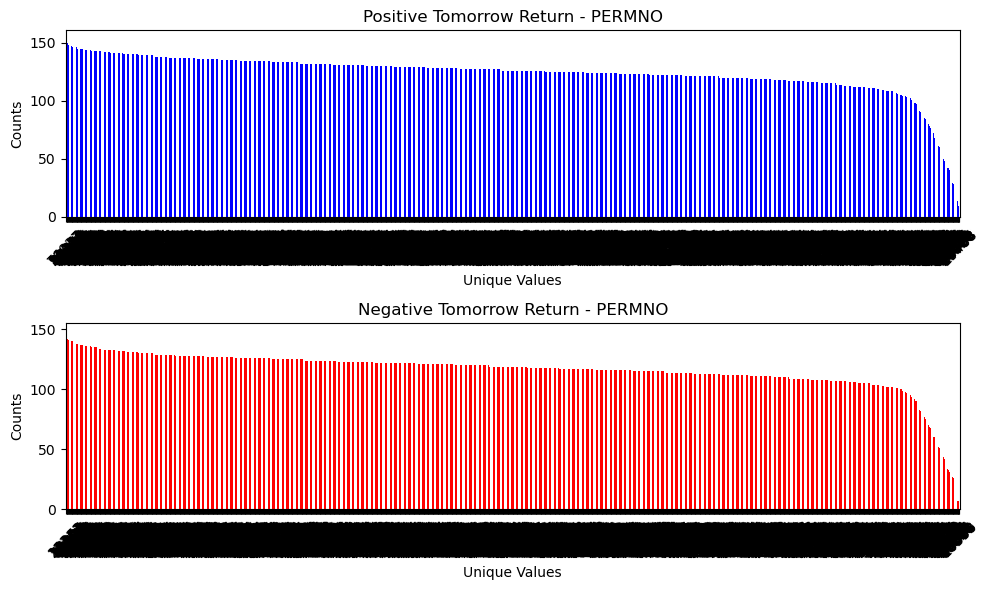

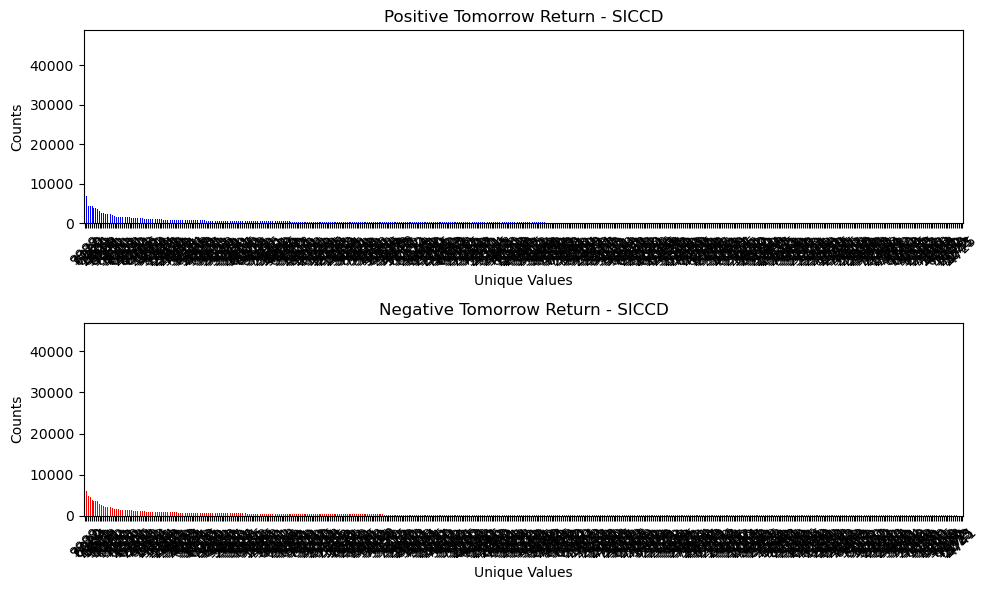

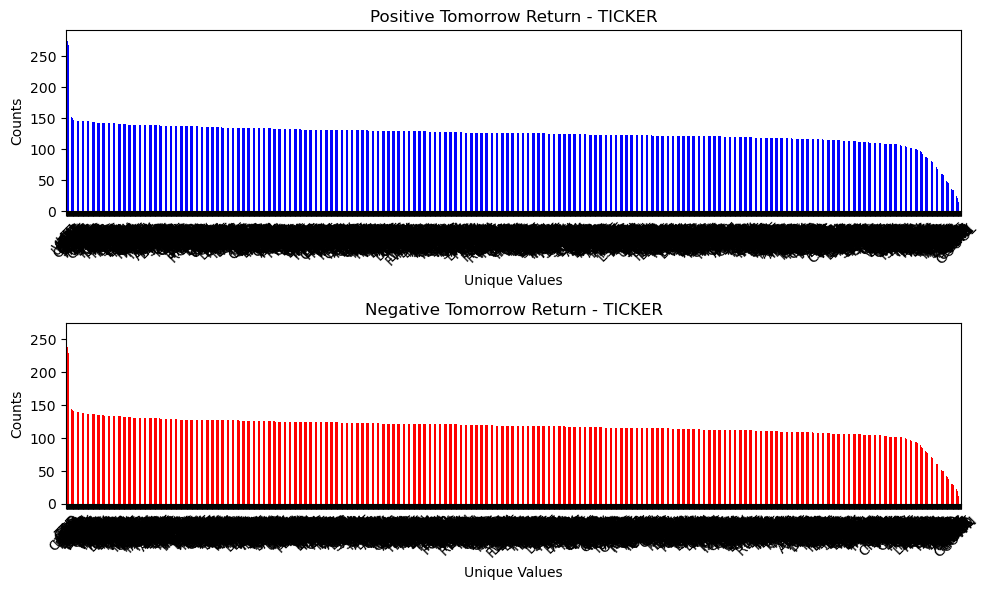

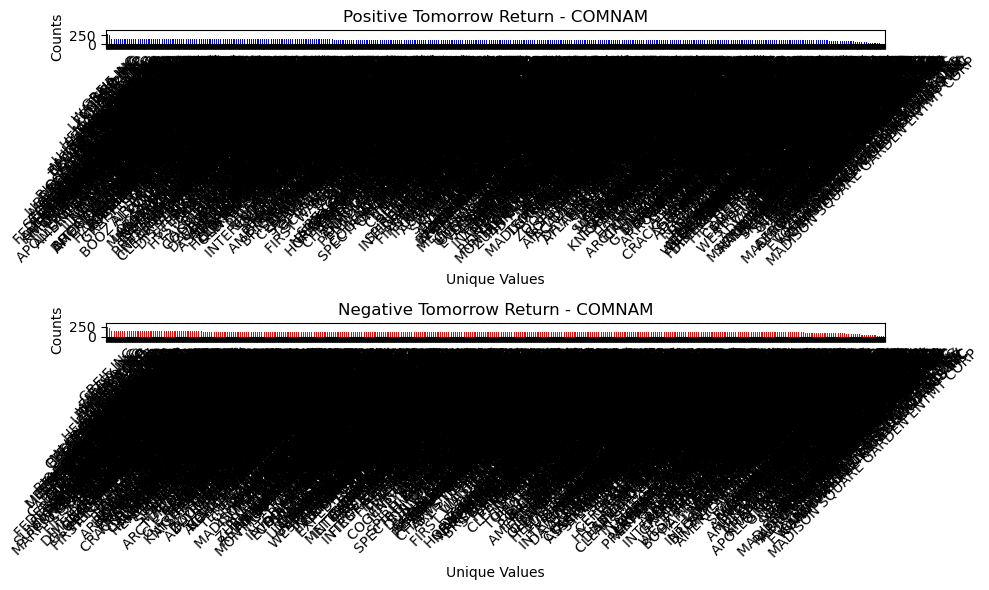

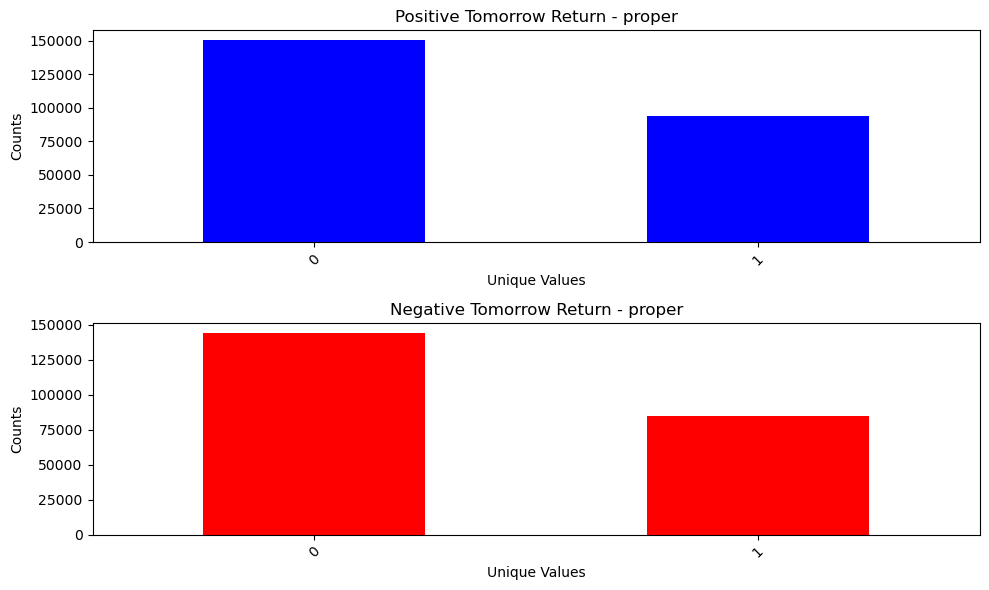

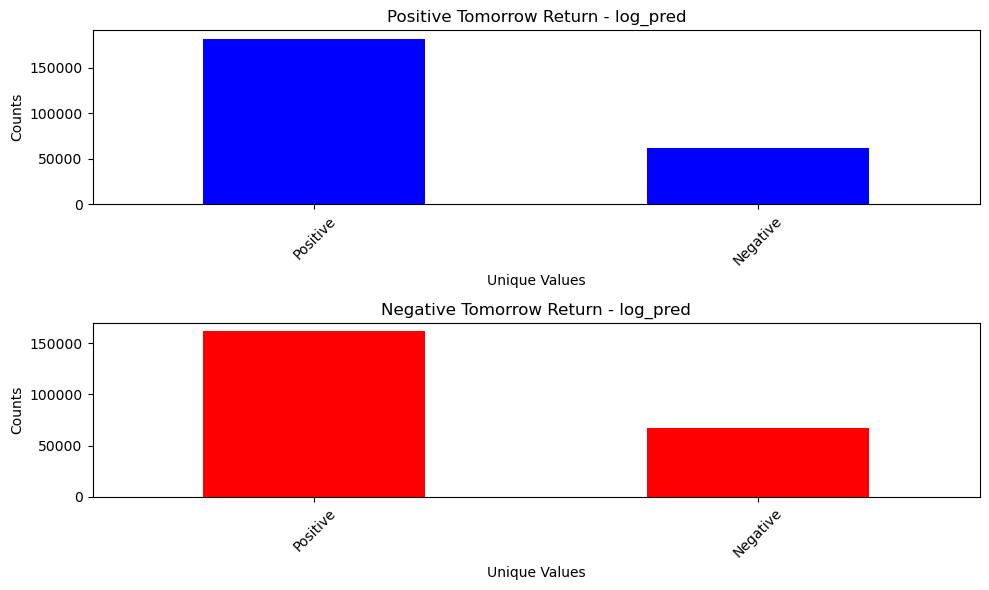

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Drop rows with NaN values in 'tomorrow_return' column
russell.dropna(subset=['tomorrow_return'], inplace=True)

# Select only categorical columns
categorical_columns = russell.select_dtypes(include=['object'])

# Create subsets
positive_return = russell[russell['tomorrow_return'] >= 0]
negative_return = russell[russell['tomorrow_return'] < 0]

# Plot bar charts for each unique value in categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Positive return subset
    plt.subplot(2, 1, 1)
    positive_counts = positive_return[column].value_counts()
    positive_counts.plot(kind='bar', color='blue')
    plt.title(f'Positive Tomorrow Return - {column}')
    plt.xlabel('Unique Values')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    
    # Negative return subset
    plt.subplot(2, 1, 2)
    negative_counts = negative_return[column].value_counts()
    negative_counts.plot(kind='bar', color='red')
    plt.title(f'Negative Tomorrow Return - {column}')
    plt.xlabel('Unique Values')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

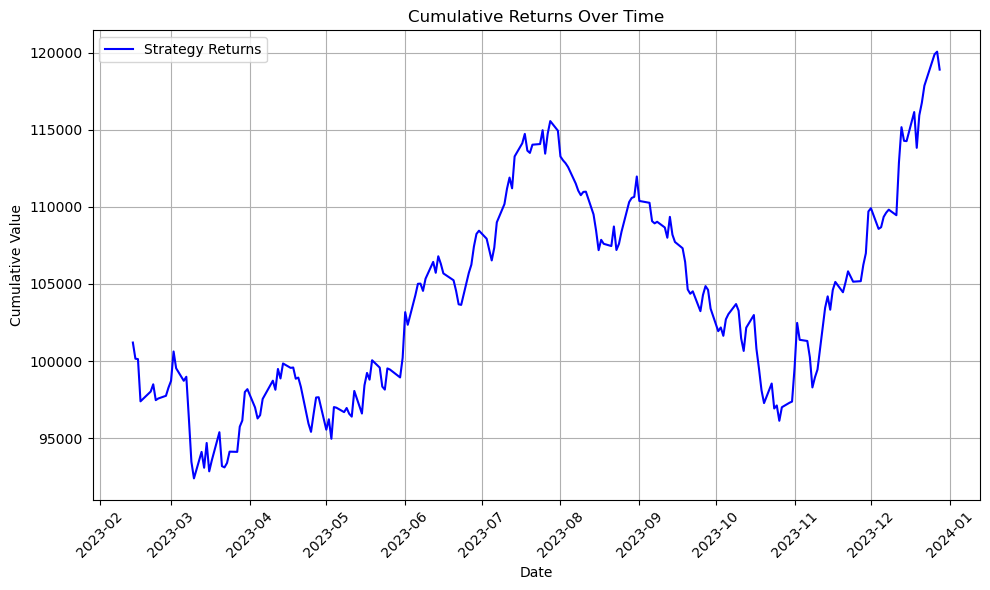

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy.loc[(russell_copy['dummy_total'] == 1), 'position'] = 1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


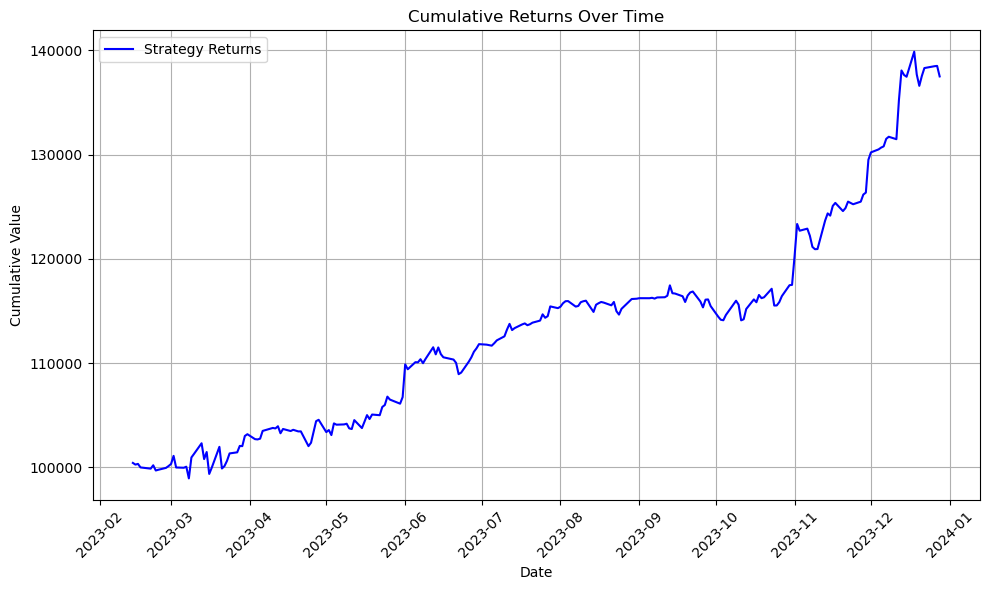

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['lasso_pred'] > 0), 'position'] = 1
russell_copy.loc[(russell_copy['lasso_pred'] < 0), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


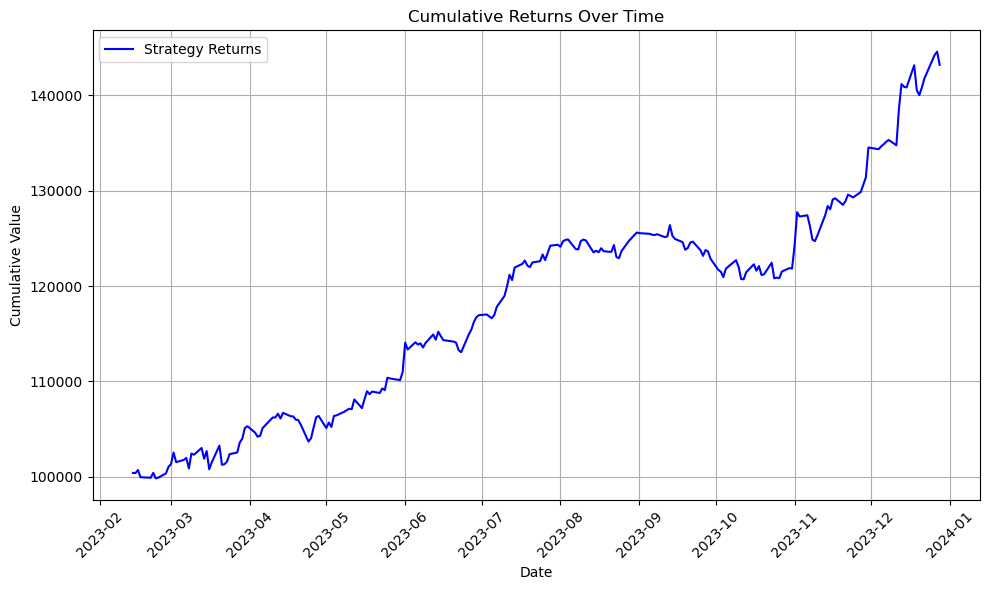

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['lasso_pred'] > 0) & (russell_copy['dummy_total'] == 1), 'position'] = 1
russell_copy.loc[(russell_copy['lasso_pred'] < 0) & (russell_copy['dummy_total'] == 1), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


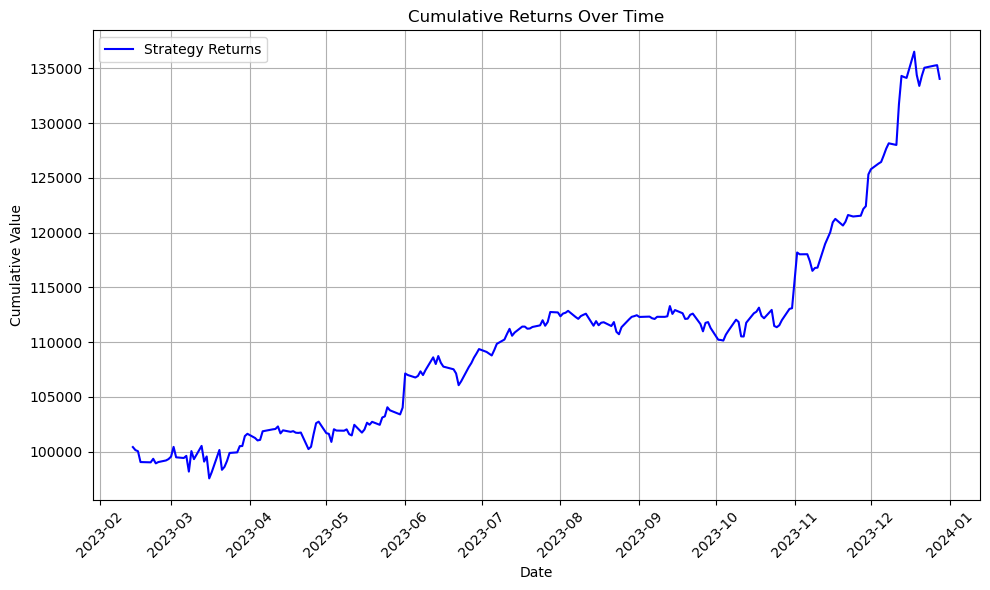

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['log_pred'] == 'Positive'), 'position'] = 1
russell_copy.loc[(russell_copy['log_pred'] == 'Negative'), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


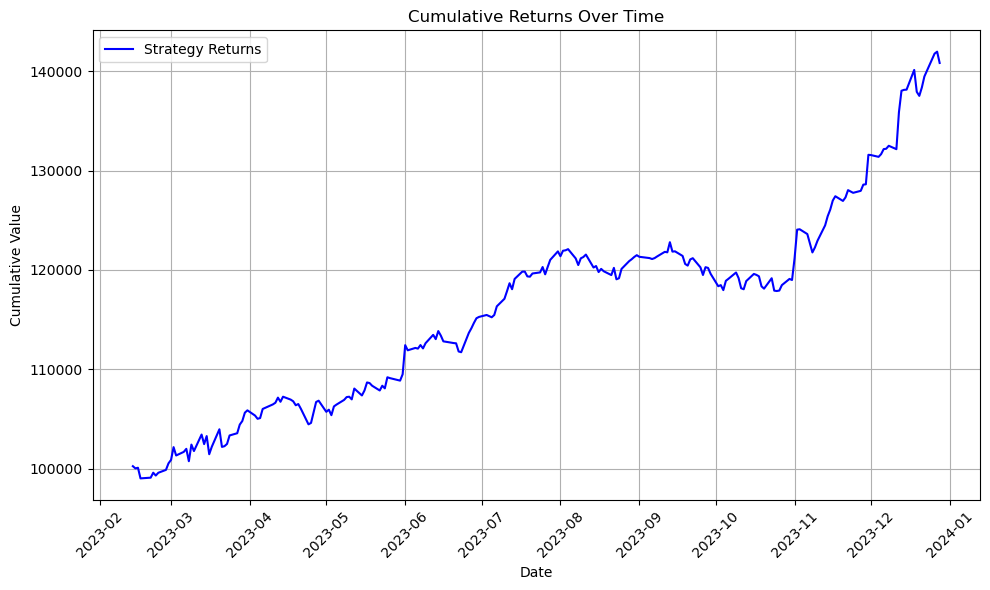

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['log_pred'] == 'Positive') & (russell_copy['dummy_total'] == 1), 'position'] = 1
russell_copy.loc[(russell_copy['log_pred'] == 'Negative') & (russell_copy['dummy_total'] == 1), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


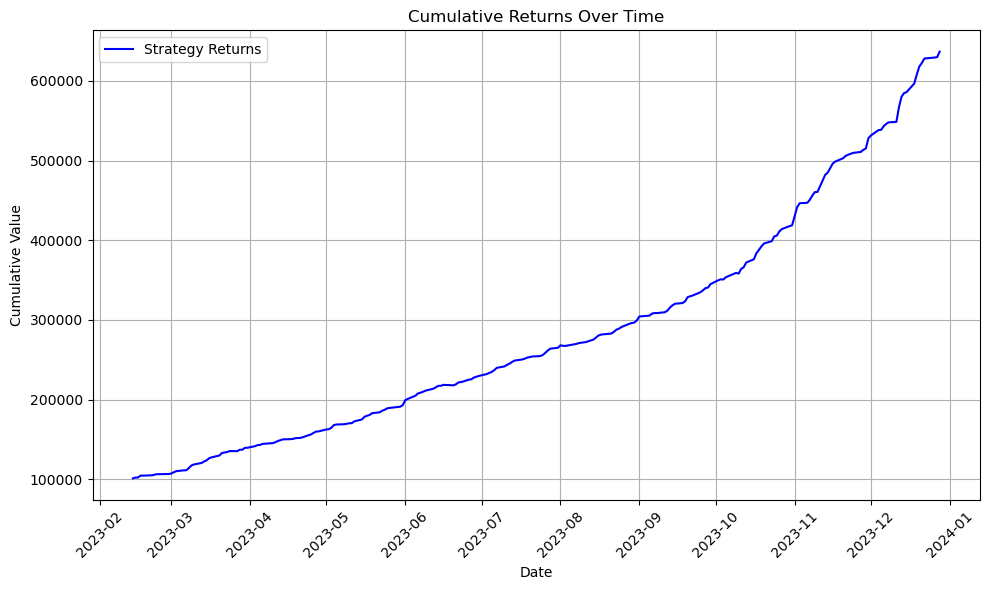

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['pred_forest'] > 0), 'position'] = 1
russell_copy.loc[(russell_copy['pred_forest'] < 0), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


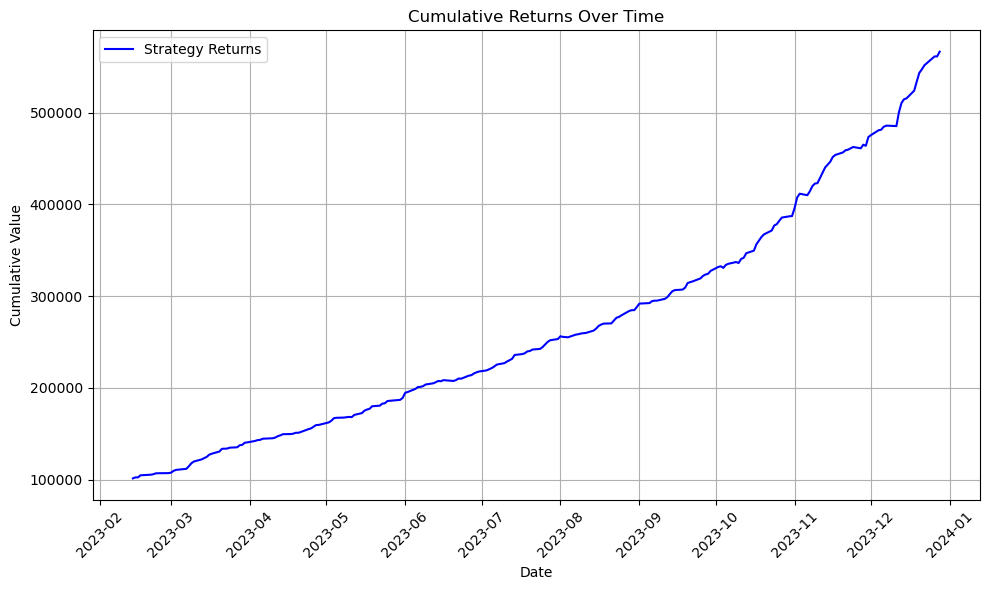

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['pred_forest'] > 0) & (russell_copy['dummy_total'] == 1), 'position'] = 1
russell_copy.loc[(russell_copy['pred_forest'] < 0) & (russell_copy['dummy_total'] == 1), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


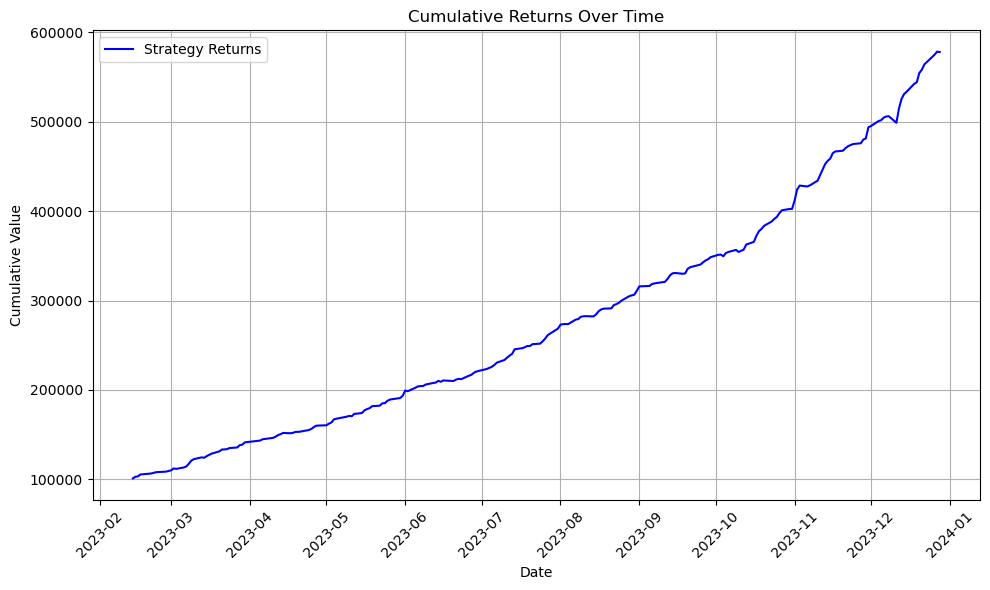

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['pred_forest'] > 0) & (russell_copy['lasso_pred'] > 0) & (russell_copy['dummy_total'] == 1), 'position'] = 1
russell_copy.loc[(russell_copy['pred_forest'] < 0) & (russell_copy['lasso_pred'] < 0) & (russell_copy['dummy_total'] == 1), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


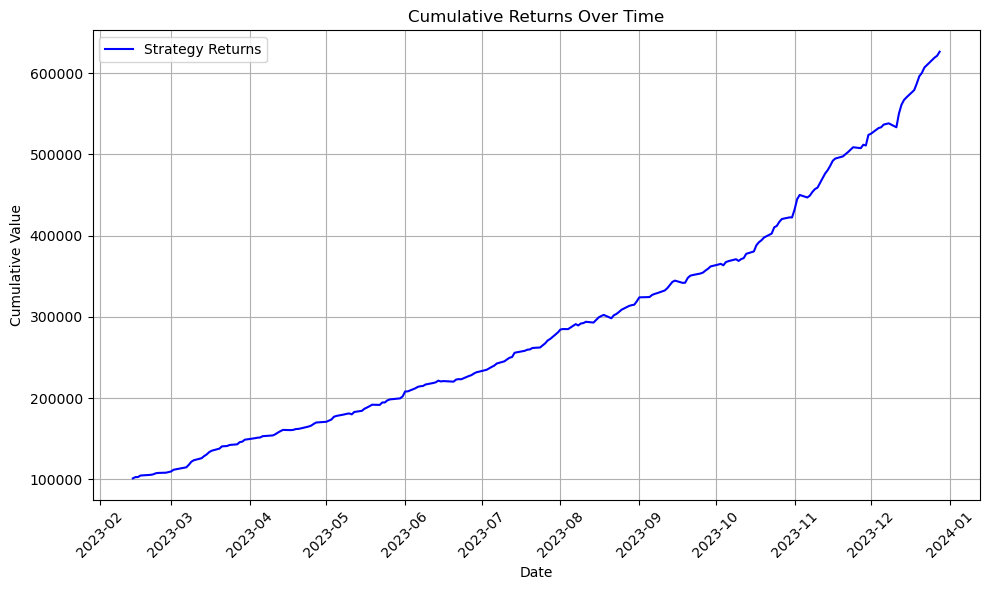

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['pred_forest'] > 0) & (russell_copy['log_pred'] == 'Positive') & (russell_copy['dummy_total'] == 1), 'position'] = 1
russell_copy.loc[(russell_copy['pred_forest'] < 0) & (russell_copy['log_pred'] == 'Negative') & (russell_copy['dummy_total'] == 1), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


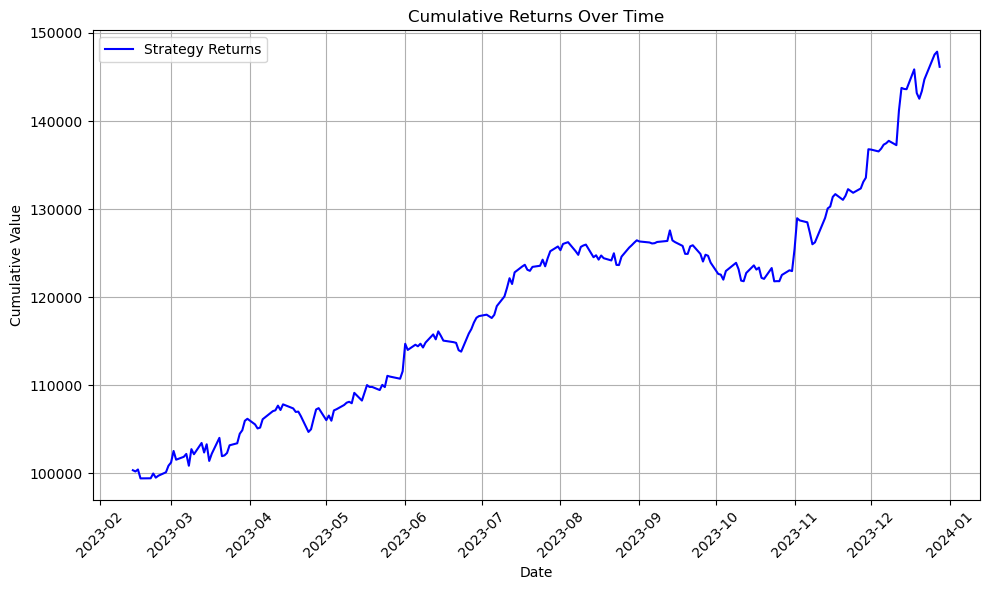

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['log_pred'] == 'Positive') & (russell_copy['lasso_pred'] > 0) & (russell_copy['dummy_total'] == 1), 'position'] = 1
russell_copy.loc[(russell_copy['log_pred'] == 'Negative') & (russell_copy['lasso_pred'] < 0) & (russell_copy['dummy_total'] == 1), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


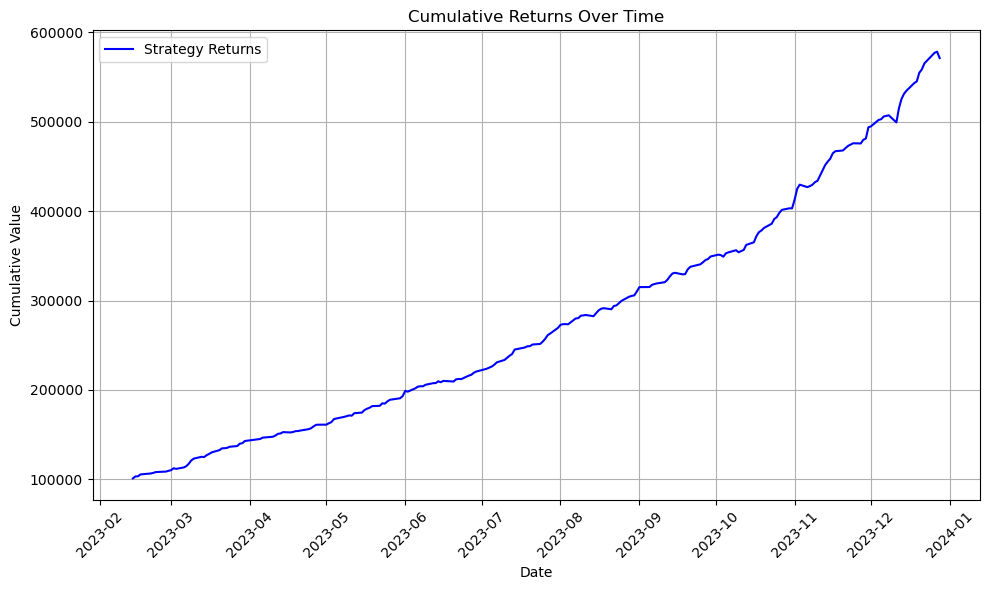

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original DataFrame
russell_copy = russell.copy()

# Convert 'date' column to datetime format
russell_copy['date'] = pd.to_datetime(russell_copy['date'], format='%Y-%m-%d')

# Filter data to include dates after February 13, 2023
russell_copy = russell_copy[russell_copy['date'] > '2023-02-13']

# Create a new column 'position' based on the conditions
russell_copy['position'] = 0
russell_copy.loc[(russell_copy['pred_forest'] > 0) & (russell_copy['lasso_pred'] > 0) & (russell_copy['dummy_total'] == 1) & (russell_copy['log_pred'] == 'Positive'), 'position'] = 1
russell_copy.loc[(russell_copy['pred_forest'] < 0) & (russell_copy['lasso_pred'] < 0) & (russell_copy['dummy_total'] == 1) & (russell_copy['log_pred'] == 'Negative'), 'position'] = -1

# Initialize initial investment amount for the strategy
initial_investment = 100000
# Initialize a list to store cumulative values for the strategy
cumulative_values = [initial_investment]

# Calculate daily mode of 'sprtrn' for S&P 500
daily_mode_sprtrn = russell_copy.groupby('date')['sprtrn'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Initialize initial investment amount for S&P 500
initial_investment_sp500 = 100000
# Initialize a list to store cumulative values for S&P 500
cumulative_values_sp500 = [initial_investment_sp500]

# Iterate over each unique date
unique_dates = russell_copy['date'].unique()
for i in range(len(unique_dates) - 1):
    # Filter data for the current date for the strategy
    current_date_data = russell_copy[russell_copy['date'] == unique_dates[i]]
    # Filter data for the current date for S&P 500
    current_date_sprtrn = daily_mode_sprtrn[daily_mode_sprtrn['date'] == unique_dates[i]]
    
    # Count the number of companies with positions of 1 or -1 for the current date for the strategy
    num_pos_1 = (current_date_data['position'] == 1).sum()
    num_neg_1 = (current_date_data['position'] == -1).sum()
    
    # Calculate investment per company for the current date for the strategy
    investment_per_company = cumulative_values[-1] / (num_pos_1 + num_neg_1)
    
    # Calculate strategy return for each company for the current date
    strategy_returns = current_date_data['position'] * current_date_data['tomorrow_return'] * investment_per_company
    
    # Sum up the returns for all companies for the current date for the strategy
    total_returns = strategy_returns.sum()
    
    # Append cumulative value for the next date for the strategy
    cumulative_values.append(cumulative_values[-1] + total_returns)
    

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(unique_dates[:-1], cumulative_values[1:], label='Strategy Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
